# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [67]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import math

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


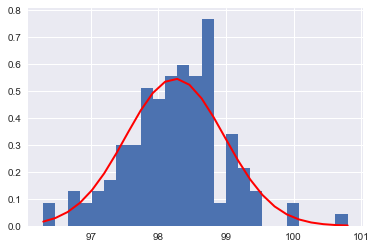

98.24923076923078
0.7303577789050377
98.24923076923078


In [31]:
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
s = np.random.normal(mu, sigma, size=130)
count, bins, ignored = plt.hist(df.temperature, 25, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()


### 1.  Is the distribution of body temperatures normal?

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


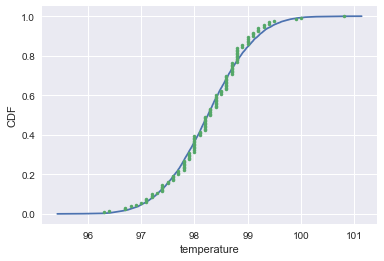

In [14]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the body temperature are Normally distributed.

### 2. Is the sample size large? Are the observations independent? 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Yes, the sample size is large because it's greater than 30. The observations are indipendent because an observation doesn't inform us about another one.

### 3. Is the true population mean really 98.6 degrees F? 

 Would you use a one-sample or two-sample test? Why?
 I use one-sample test because of the data that I have. 

In [33]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [37]:
# Take 10,000 bootstrap replicates of the mean
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df.temperature, np.mean)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


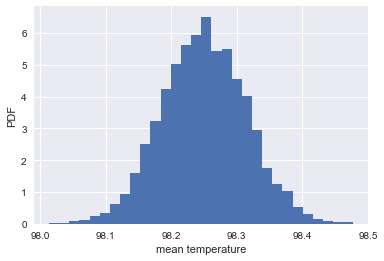

In [38]:
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')
plt.show()

In [43]:
# Compute the 95% confidence interval
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print ("The 95% confidence interval is: " + str(conf_int_95))

The 95% confidence interval is: [98.12692308 98.37692308]


In [44]:
# Compute the 99% confidence interval
conf_int_99 = np.percentile(bs_replicates, [0.5, 99.5])
print ("The 99% confidence interval is: " + str(conf_int_99))

[98.08537308 98.41769231]


From these results, I can say that the mean is not 98.6 at all.

In this situation, is it appropriate to use the t or z statistic?
It's more appropriate to use z statistic because the sample size is greater than 30.

In [7]:
def ztest(sample,mean,std):
    return  (sample-mean)/std
    

In [26]:
print (ztest(98.6,df.temperature.mean(),df.temperature.std()))

0.4784196512470687


It means that we are about 0.5 standard deviation above the mean.

In [16]:
from scipy import stats
stats.ttest_1samp(df.temperature.values, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The probability that the actual mean temperature is 98.6 is very small, 2.4 e-07.

###  4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

###### Which one is the correct one to use? 
The t-test is the more correct for sample less than 30.


In [51]:
ts_replicates = np.empty(10)
for i in range(10):
    ts_replicates[i] = bootstrap_replicate_1d(df.temperature, np.mean)

In [56]:
# Compute the 95% confidence interval
conf_int_95 = np.percentile(ts_replicates, [2.5, 97.5])
print ("The 95% confidence interval is: " + str(conf_int_95))

The 95% confidence interval is: [98.15282692 98.34073077]


In [53]:
stats.ttest_1samp(ts_replicates, 98.6)

Ttest_1sampResult(statistic=-17.2313706806522, pvalue=3.364563174924064e-08)

In [54]:
print (ztest(98.6,ts_replicates.mean(),ts_replicates.std()))

5.743790226884066


###### What do you notice? What does this tell you about the difference in application of the t and z statistic?
I notice that the result of z-test has a value too big, due to the small sample. And I can think that I can use the t-test in case the sample is more than 30 but not the z-test if it is less than 30.

### 5. At what temperature should we consider someone's temperature to be "abnormal"? 

As in the previous example, I use bootstrap approach and I calculate the 95% of Confidence Intervals. 

In [60]:
# Take 10,000 bootstrap replicates of the mean
ts_replicates = np.empty(10000)
for i in range(10000):
    ts_replicates[i] = bootstrap_replicate_1d(df.temperature, np.mean)

In [62]:
mean, sigma = ts_replicates.mean(), ts_replicates.std(ddof=1)
conf_int_t = stats.norm.interval(0.95, loc=mean, scale=sigma)
print (conf_int_t)

(98.12422168071402, 98.37211355005522)


I can consider an 'abnormal' temperature when it is outside the found boundaries.


### 6. Is there a significant difference between males and females in normal temperature? 

What testing approach did you use and why? 
I decided to use the t-test to compare the means of a normally distributed interval dependent variable for two independent groups when the standard deviation is not known.

In [79]:
male = df.loc[df.gender == "M"]
female = df.loc[df.gender == "F"]

In [81]:
stats.ttest_ind(male.temperature, female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The p-value tells us that the probability of the two (male and female) means are identical is 2.4%. 

###### Write a story with your conclusion in the context of the original problem. 

For more than 120 years we though that the mean normal body temperature was held to be 98.6 ∘F. 
But from the analysis done above on a dataset of 130 human body temperatures, we can say that the temperature is closer to the mean of 98.25 ∘F. 